In [110]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'train').iloc[:,1:]
test=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'test').iloc[:,1:]

In [4]:
train.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,3,6,4,4,2,6,12,2,7,11,9,4,1,11,2,5
1,T,6,8,6,6,3,4,12,3,8,12,10,4,1,10,2,5
2,T,2,1,3,2,1,6,12,3,6,8,11,7,2,11,1,7
3,T,10,14,8,8,4,7,8,3,10,13,6,6,2,9,5,5
4,T,5,10,7,7,8,6,8,4,6,7,6,9,5,8,5,6


In [5]:
test.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,7,9,8,8,8,6,8,3,9,8,7,9,3,8,8,6
1,T,3,3,4,2,2,6,11,3,7,11,9,5,1,11,3,4
2,T,3,8,5,6,4,6,11,2,7,8,11,8,2,12,1,7
3,T,4,8,5,6,4,6,11,3,7,8,11,8,2,12,1,7
4,T,5,10,7,8,6,6,7,7,7,8,9,8,4,9,7,7


In [6]:
train.describe()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.00000
mean,3.999716,7.015687,5.097524,5.349839,3.484785,6.896617,7.491022,4.598469,5.201096,8.310244,6.443300,7.938386,3.013986,8.332829,3.692308,7.81100
std,1.897352,3.299718,2.005930,2.250684,2.187788,2.038540,2.328204,2.667096,2.380180,2.489567,2.621213,2.082275,2.336213,1.552404,2.567382,1.60615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
test.describe()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,10582.000000,10582.000000,10582.000000,10582.00000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,4.041864,7.054527,5.136269,5.39312,3.515498,6.895861,7.492723,4.647704,5.183047,8.262899,6.440654,7.965035,3.050936,8.335286,3.716027,7.807031
std,1.933945,3.315806,2.030518,2.27536,2.191282,2.027671,2.311057,2.724239,2.398895,2.498097,2.625477,2.072978,2.328059,1.526640,2.583190,1.620618
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,14.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [8]:
xtrain = train.iloc[:,1:]
ytrain = train.iloc[:,:1]
xtest = train.iloc[:,1:]
ytest = train.iloc[:,:1]

In [33]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

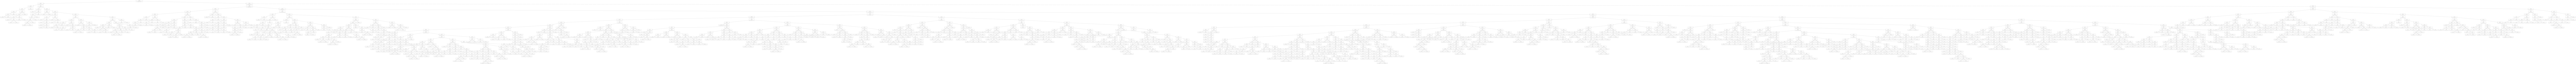

In [66]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names= ['x-box','y-box','width','height','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'])
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [63]:
y_pred = dt.predict(xtest)

In [82]:
confusion_matrix(y_pred,ytest)

array([[304,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  10,
          3,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

### Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>



<hr>

### Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)

In [83]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [84]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020879,0.004612,0.003242,0.000569,1,{'max_depth': 1},0.068011,0.065197,0.070750,0.068851,...,0.068513,0.001901,39,0.068639,0.069349,0.067957,0.068429,0.068193,0.068513,0.000476
1,0.022175,0.000561,0.003228,0.000453,2,{'max_depth': 2},0.128518,0.123358,0.126781,0.123932,...,0.125874,0.001939,38,0.125325,0.126627,0.125767,0.126475,0.125767,0.125992,0.000486
2,0.026577,0.000397,0.003482,0.000350,3,{'max_depth': 3},0.181989,0.177767,0.179012,0.175689,...,0.178889,0.002112,37,0.178343,0.179408,0.178976,0.179802,0.178858,0.179077,0.000496
3,0.032244,0.004499,0.003591,0.000489,4,{'max_depth': 4},0.257036,0.255629,0.266382,0.252137,...,0.257040,0.004935,36,0.258462,0.258698,0.255781,0.259202,0.258849,0.258198,0.001232
4,0.033462,0.000648,0.003630,0.000594,5,{'max_depth': 5},0.373827,0.363508,0.381292,0.366572,...,0.369684,0.006938,35,0.372781,0.375266,0.370458,0.373289,0.373761,0.373111,0.001565


Now let's visualize how train and test score changes with max_depth.

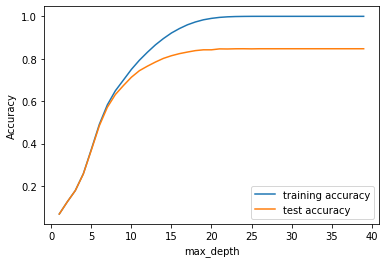

In [87]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [88]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [89]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059791,0.000507,0.003867,0.000160,5,{'min_samples_leaf': 5},0.812383,0.805347,0.820988,0.798196,...,0.806086,0.009822,1,0.889467,0.884379,0.884261,0.887919,0.885087,0.886223,0.002095
1,0.131014,0.156761,0.004127,0.000140,25,{'min_samples_leaf': 25},0.722795,0.697936,0.725546,0.708927,...,0.709979,0.012543,2,0.740237,0.739645,0.732421,0.746107,0.739972,0.739676,0.004345
2,0.052293,0.007416,0.004093,0.001106,45,{'min_samples_leaf': 45},0.679174,0.657129,0.686610,0.666667,...,0.669722,0.011452,3,0.682367,0.684497,0.685583,0.694313,0.687471,0.686846,0.004082
3,0.051497,0.010699,0.003914,0.000313,65,{'min_samples_leaf': 65},0.658537,0.623358,0.660969,0.636277,...,0.641467,0.015518,4,0.649349,0.653254,0.653610,0.654672,0.656796,0.653536,0.002430
4,0.044146,0.002435,0.003859,0.000432,85,{'min_samples_leaf': 85},0.609756,0.591932,0.622982,0.615385,...,0.606029,0.012931,5,0.615385,0.618698,0.615857,0.622345,0.623643,0.619186,0.003335


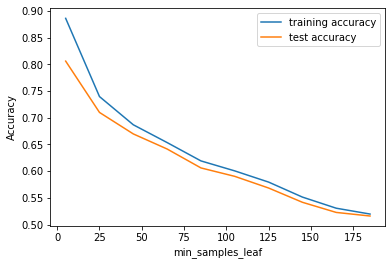

In [90]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.



### Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [91]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [92]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.067838,0.004987,0.003737,0.000842,5,{'min_samples_split': 5},0.848968,0.827861,0.846629,0.823362,...,0.834908,0.010688,1,0.963550,0.961183,0.960005,0.962010,0.963426,0.962035,0.001348
1,0.064704,0.007855,0.004156,0.000986,25,{'min_samples_split': 25},0.798780,0.782833,0.798670,0.780627,...,0.786619,0.010526,2,0.858817,0.851598,0.847688,0.850755,0.844974,0.850766,0.004659
2,0.056505,0.000340,0.003779,0.000421,45,{'min_samples_split': 45},0.763133,0.744371,0.764008,0.747863,...,0.752126,0.009588,3,0.802722,0.800237,0.794361,0.803209,0.796366,0.799379,0.003488
3,0.053676,0.000441,0.003247,0.000444,65,{'min_samples_split': 65},0.742495,0.724672,0.736942,0.712251,...,0.727462,0.010949,4,0.766746,0.766272,0.759202,0.762860,0.769113,0.764839,0.003454
4,0.053706,0.002231,0.003170,0.000411,85,{'min_samples_split': 85},0.731707,0.697936,0.724122,0.700855,...,0.711302,0.013866,5,0.742249,0.738462,0.744337,0.744573,0.743747,0.742673,0.002256


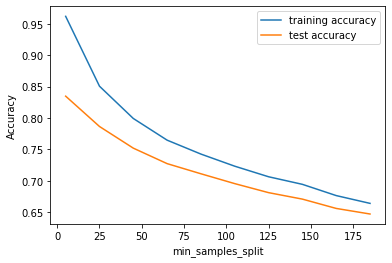

In [93]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.


## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [114]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)
# Fit the grid search to the data
grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [95]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041852,0.007913,0.003779,0.001170,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.510788,0.489681,0.516619,0.501899,0.474359,0.498677,0.015155,9
1,0.034633,0.000449,0.003374,0.000467,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.510788,0.489681,0.516619,0.501899,0.474359,0.498677,0.015155,9
2,0.034001,0.000334,0.003622,0.000342,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.509850,0.486398,0.506173,0.501899,0.473409,0.495558,0.013642,11
3,0.034172,0.000534,0.003391,0.000547,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.509850,0.486398,0.506173,0.501899,0.473409,0.495558,0.013642,11
4,0.043978,0.000653,0.003382,0.000495,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.648687,0.636023,0.649098,0.637227,0.621557,0.638537,0.010097,3
5,0.044138,0.000675,0.003407,0.000475,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.648687,0.636023,0.649098,0.637227,0.621557,0.638537,0.010097,3
6,0.039548,0.001011,0.003688,0.000525,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.607411,0.594278,0.609687,0.579772,0.556030,0.589492,0.019802,5
7,0.039020,0.000404,0.003657,0.000387,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.607411,0.594278,0.609687,0.579772,0.556030,0.589492,0.019802,5
8,0.031202,0.000640,0.003290,0.000396,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.369606,0.359756,0.378917,0.359924,0.359449,0.365526,0.007704,13
9,0.031527,0.000997,0.003576,0.000472,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.369606,0.359756,0.378917,0.359924,0.359449,0.365526,0.007704,13


In [96]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.639009639009639
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Running the model with best parameters obtained from grid search.

In [97]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [98]:
# accuracy score
clf_gini.score(xtest,ytest)

0.6664146664146664

In [99]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(xtrain, ytrain)

# score
print(clf_gini.score(xtest,ytest))

0.17832167832167833


In [112]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           A       0.95      0.75      0.84       407
           B       0.00      0.00      0.00       407
           C       0.00      0.00      0.00       407
           D       0.00      0.00      0.00       407
           E       0.00      0.00      0.00       407
           F       0.00      0.00      0.00       407
           G       0.00      0.00      0.00       407
           H       0.00      0.00      0.00       407
           I       0.22      0.84      0.35       407
           J       0.22      0.10      0.14       407
           K       0.00      0.00      0.00       407
           L       0.94      0.67      0.79       407
           M       0.00      0.00      0.00       407
           N       0.00      0.00      0.00       407
           O       0.06      1.00      0.12       407
           P       0.00      0.00      0.00       407
           Q       0.00      0.00      0.00       407
           R       0.00    

In [101]:
# confusion matrix
print(confusion_matrix(ytest,y_pred))

[[304   0   0   0   0   0   0   0   1  11   0   3   0   0  88   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24   0   0   0   0   0 382   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 227   0   0   0   0   0 170   0   0   0
    0  10   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   0   0   0 401   0   0   0
    0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0 124   0   0   0   0   0 279   0   0   0
    0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7   0   0   0   0   0 112   0   0   0
    0 287   0   0   1   0   0   0]
 [  1   0   0   0   0   0   0   0  46   1   0   0   0   0 356   0   0   0
    0   0   0   0   3   0   0   0]
 [  1   0   0   0   0   0   0   0   0  10   0   0   0   0 379   0   0   0
    0  17   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 340   4   0   0   0   0  62   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0   0  